# Q-7. 

Imagine you have a dataset where you need to predict the Genres of Music

using an Unsupervised algorithm and 

you need to find the accuracy of the model, built-in

docker, and use some library to display that in frontend

Dataset : https://www.kaggle.com/datasets/insiyeah/musicfeatures

# Libraries

In [70]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
import pacmap
import folium
from sklearn.metrics import silhouette_score
import joblib

# Data Ingestion

In [3]:
file1 = "data/data.csv"
file2 = "data/data_2genre.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [4]:
df1.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [5]:
df2.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [6]:
df1.shape

(1000, 30)

In [7]:
df2.shape

(200, 30)

In [8]:
df1.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [9]:
df2.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

# EDA & FE

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [13]:
# Categorical features
df1.select_dtypes('object').columns.to_list()

['filename', 'label']

There are only two categorical features. The first is the filename which is irrelevant to the objective. and the second is label, which we need to encode.

## Drop filename column

In [16]:
df1.drop(columns=['filename'], inplace=True)
df2.drop(columns=['filename'], inplace=True)

## Encoding label column


In [14]:
df1.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [23]:
df2.label.unique()

array([1, 2])

In [15]:
df1.label.value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

In [24]:
df2.label.value_counts()

label
1    100
2    100
Name: count, dtype: int64

In [19]:
# Encoding using get_dummies as the variables are not ordinal

label_encoded = pd.get_dummies(df1.label, drop_first=False, dtype=int)

In [20]:
X_test = pd.concat([df1, label_encoded], axis=1)

In [28]:
X_test.drop(columns=['label'], inplace=True)

In [29]:
X_test.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,1,0,0,0,0,0,0,0,0,0
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,1,0,0,0,0,0,0,0,0,0
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,1,0,0,0,0,0,0,0,0,0
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,1,0,0,0,0,0,0,0,0,0
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,1,0,0,0,0,0,0,0,0,0


In [30]:
len(X_test.columns)

38

## Data Visualization

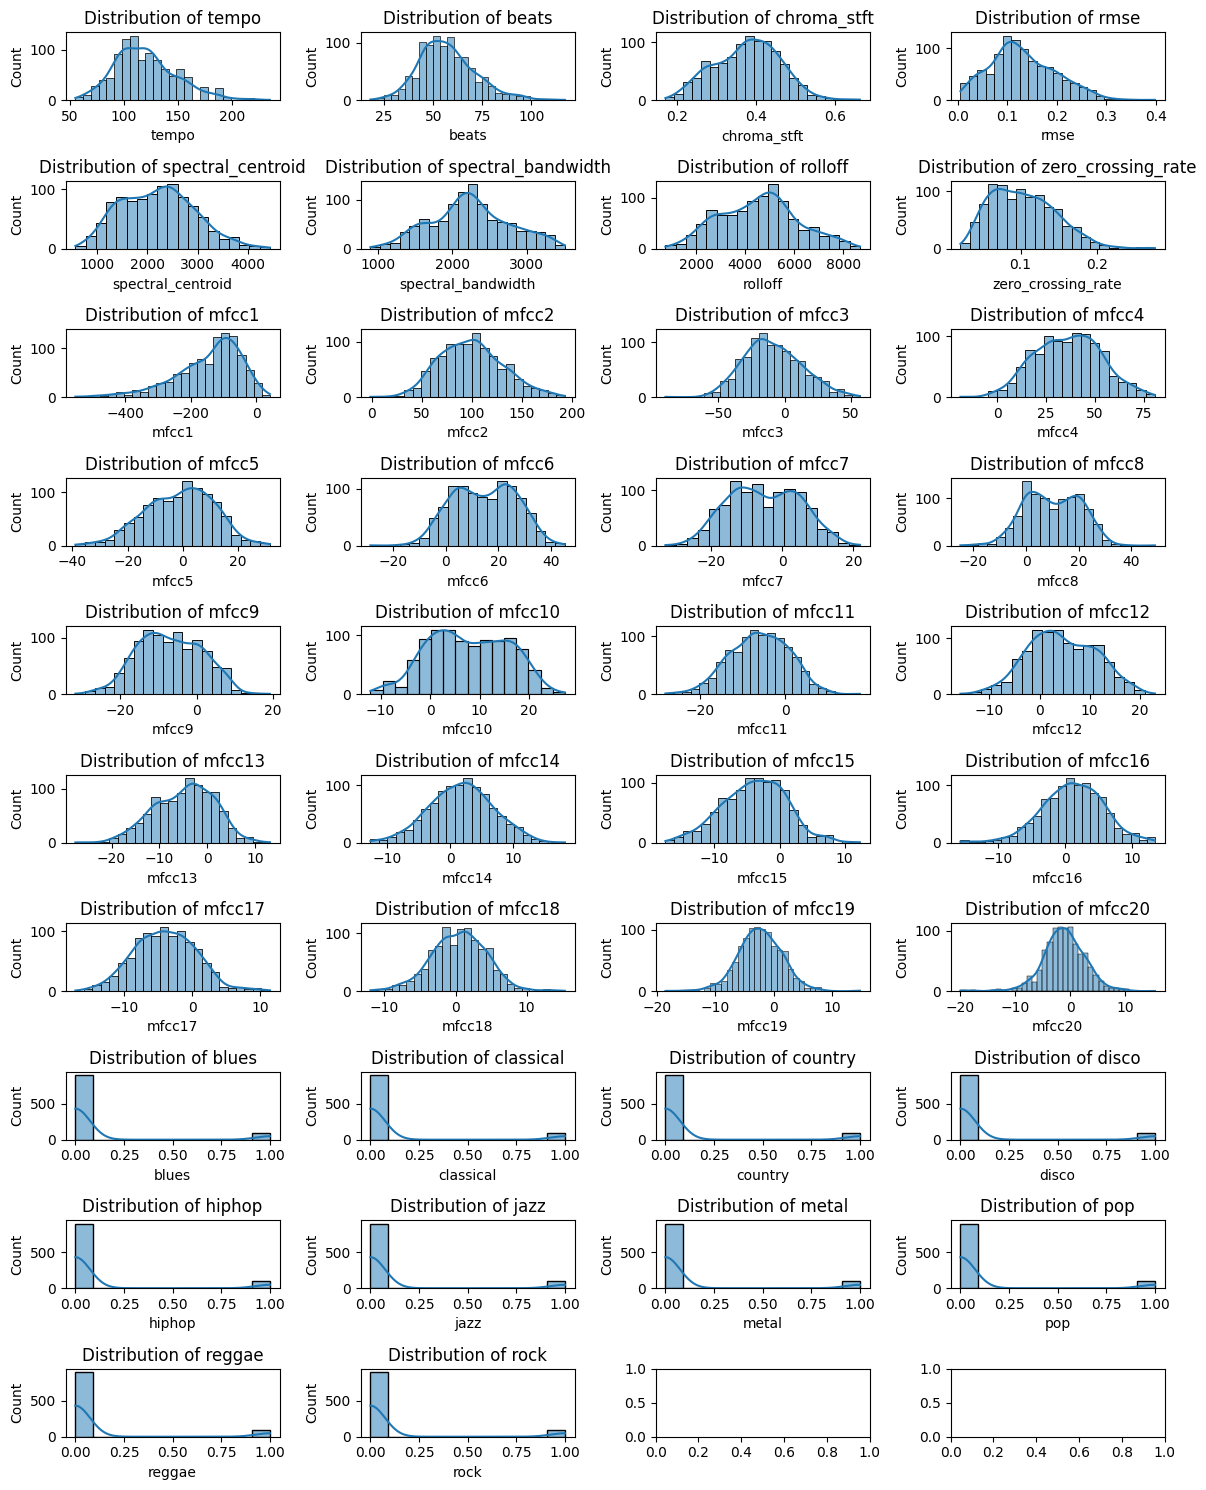

In [31]:
fig,axes = plt.subplots(10,4,figsize=(12,15))
for idx,feature in enumerate(X_test.columns.to_list()):
    row,col = idx//4,idx%4
    ax = axes[row, col]
    sns.histplot(X_test[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    # ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {feature}')


plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

# Feature Selection

In [42]:
# Method 1: Perform feature selection using VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [X_test.columns[i] for i in selected_feature_indices]


# Print the selected feature indices for both methods
print("Important feature in order (high to low):", '\n', selected_feature_names)


Important feature in order (high to low): 
 ['tempo', 'beats', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [44]:
# first 25 important features
selected_feature_names[:25]

['tempo',
 'beats',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20']

In [45]:
X = X_test[selected_feature_names[:25]]

# Apply Standard scaler

In [46]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Clustering using kmeans algorithm

/home/tinku/anaconda3/envs/assesment/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tinku/anaconda3/envs/assesment/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tinku/anaconda3/envs/assesment/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/tinku/anaconda3/envs/assesment/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

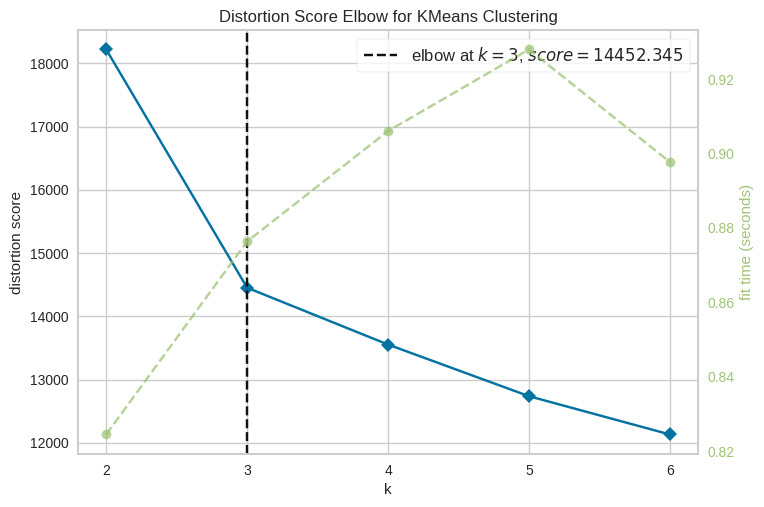

In [47]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X_scaled)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

In [48]:
# Based on the elbow curve, choose the optimal number of clusters
k = 3  

In [49]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=k, 
            max_iter=300, 
            tol=1e-04, 
            init='k-means++', 
            n_init=10, 
            random_state=42, 
            algorithm='lloyd')
kmeans.fit(X)

# Add cluster labels to the dataset
X['cluster_label'] = kmeans.labels_

/tmp/ipykernel_6817/650669233.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = kmeans.labels_


In [51]:
# checking the dtype of cluster_label column
X.cluster_label.unique()

array([0, 1, 2], dtype=int32)

In [53]:
cluster_colors = ['orange', 'lightblue', 'green']

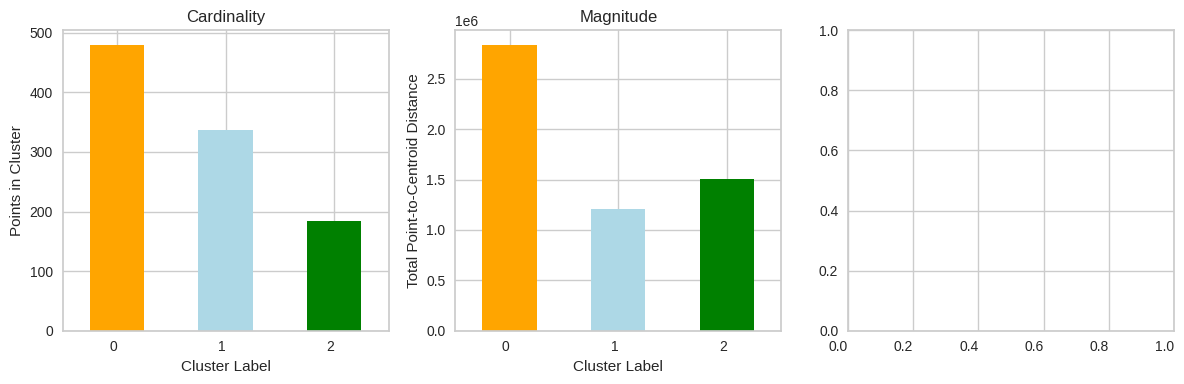

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(kmeans.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X_scaled,
                       kmeans.labels_,
                       kmeans.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
# plot_magnitude_vs_cardinality(X.iloc[:,:-1],
#                               kmeans.labels_,
#                               kmeans.cluster_centers_,
#                               euclidean,
#                               color=cluster_colors[0:kmeans.n_clusters],
#                               ax=ax3, 
#                               title="Magnitude vs. Cardinality")


fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

/home/tinku/anaconda3/envs/assesment/lib/python3.9/site-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


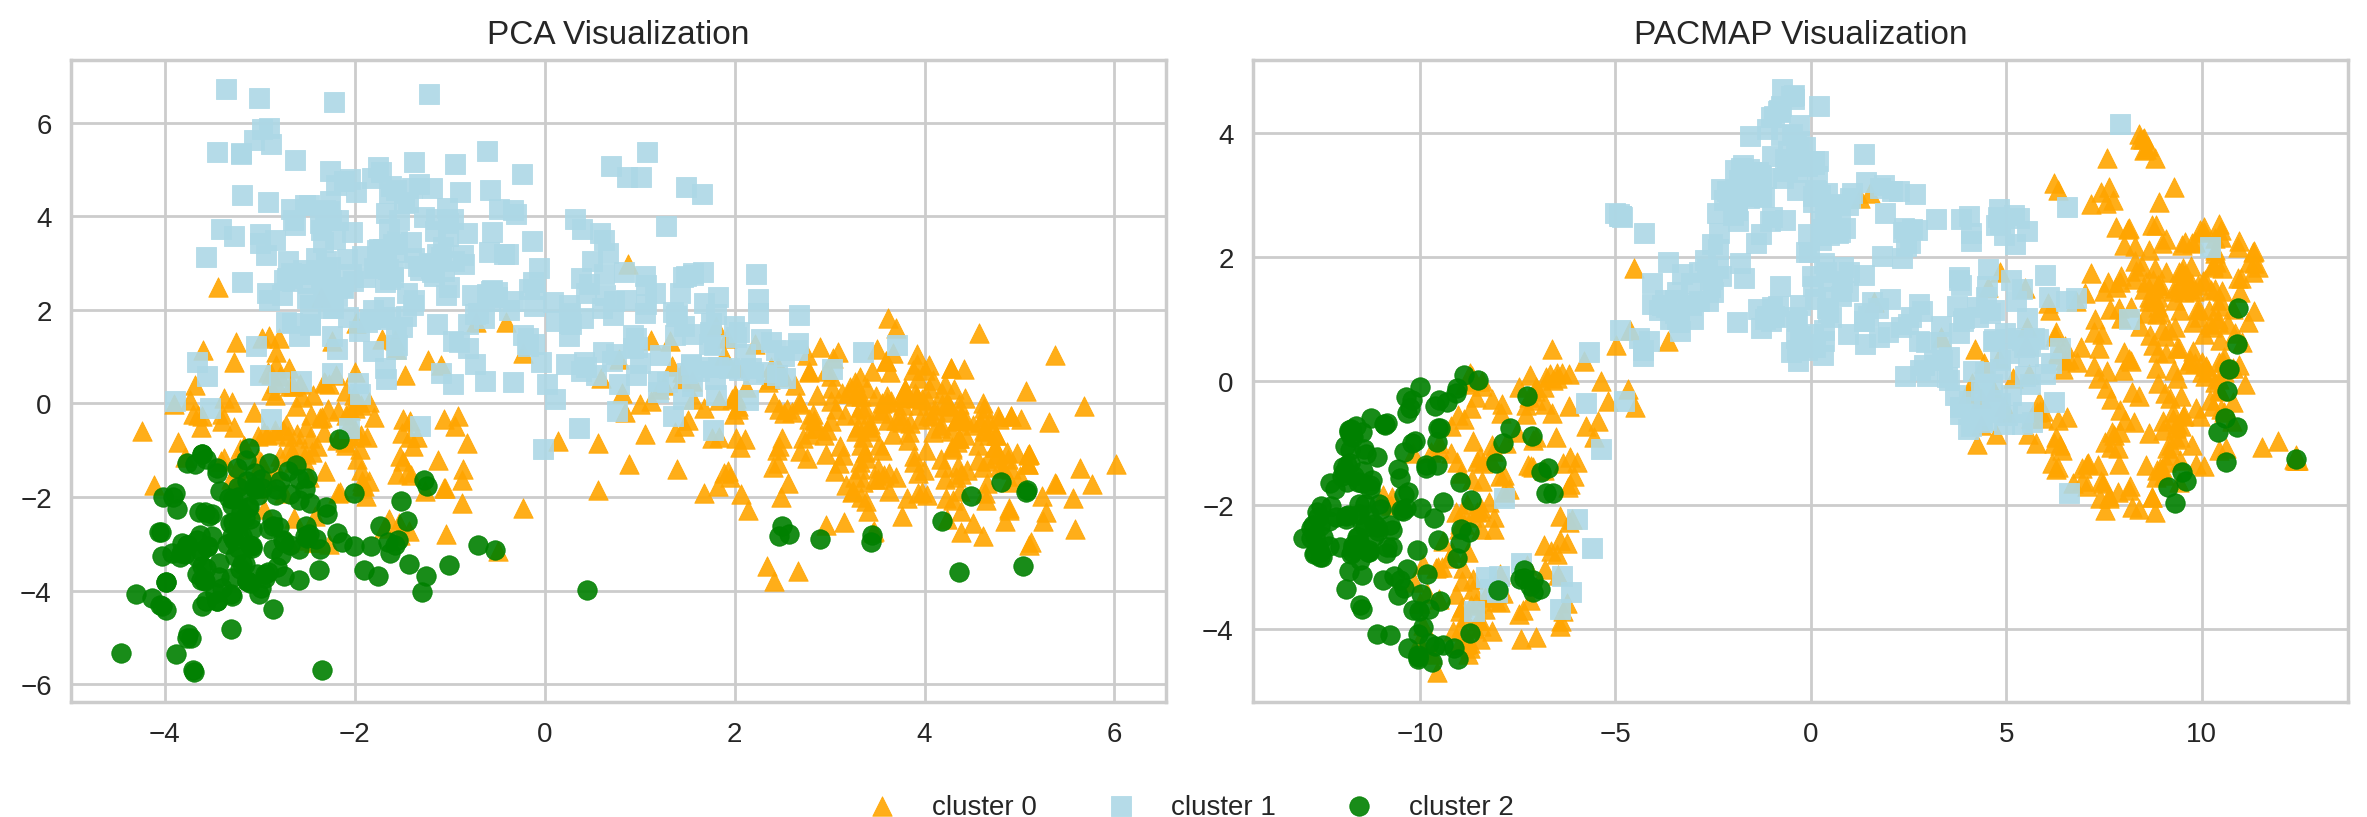

In [62]:
# Visualizing pca and pacmap

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4), dpi=200)

# PCA
pca_scaled_std = PCA(n_components=2,random_state=42)
X_std_pca = pca_scaled_std.fit_transform(X_scaled)

for l, c, m in zip(range(0, 4), cluster_colors[0:kmeans.n_clusters], ('^', 's', 'o', 'd')):
    ax1.scatter(X_std_pca[:, 0][kmeans.labels_ == l],
                X_std_pca[:, 1][kmeans.labels_ == l],
                # X_std_pca['price' == l, 0],
                # X_std_pca['price' == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )

# PACMAP
embedding = pacmap.PaCMAP(random_state=42)
X_std_pacmap = embedding.fit_transform(X_scaled)

for l, c, m in zip(range(0, 4), cluster_colors[0:kmeans.n_clusters], ('^', 's', 'o', 'd')):
    ax2.scatter(X_std_pacmap[:, 0][kmeans.labels_ == l],
                X_std_pacmap[:, 1][kmeans.labels_ == l],
                # X_std_pacmap['price' == l, 0],
                # X_std_pacmap['price' == l, 1],
                color=c,
                label='cluster %s' % l,
                alpha=0.9,
                marker=m
                )
    
ax1.set_title("PCA Visualization")
ax2.set_title("PACMAP Visualization")

labels = np.unique(kmeans.labels_)
labels = ["cluster "+str(l) for l in labels]
fig.legend(labels, loc='lower center',ncol=len(labels), bbox_transform=(1,0),borderaxespad=-0.5)
plt.tight_layout()
plt.show()

# Model Evaluation

In the context of evaluating K-means clustering models, the inertia and silhouette score provide insights into the quality and coherence of the clusters formed.

**Inertia:** 

Inertia measures the sum of squared distances of samples to their closest cluster center. It quantifies the compactness of the clusters. Lower inertia values indicate that the samples within each cluster are closer to their respective cluster centers, resulting in tighter and more well-defined clusters. However, inertia alone is not sufficient to determine the optimal number of clusters, as it tends to decrease with increasing K (number of clusters).

**Silhouette Score:** 

The silhouette score measures how well samples are clustered relative to other clusters. It takes into account both the average distance between samples within the same cluster (cohesion) and the average distance between samples of different clusters (separation). The silhouette score ranges from -1 to 1, where:

- A score close to 1 indicates that the samples are well-clustered, with clear separation between clusters.
- A score close to 0 suggests overlapping or ambiguous clusters.
- A score close to -1 indicates that the samples may be assigned to the wrong clusters.

In [65]:
# Get inertia (sum of squared distances)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 553153796.9690943


In [67]:
# Get predicted labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.54092494537886


# Save Model

In [71]:
os.makedirs('model', exist_ok=True)

# Save the trained model
joblib.dump(kmeans, 'model/kmeans_model.pkl')

['model/kmeans_model.pkl']